In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import torch
assert torch.cuda.is_available(), "❌ GPU non activé"
print("GPU:", torch.cuda.get_device_name(0))


AssertionError: ❌ GPU non activé

In [6]:
!pip -q install -U ultralytics
import ultralytics
print("Ultralytics:", ultralytics.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics: 8.4.11


In [7]:
MODEL_NAME = "yolo11m.pt"
RUN_NAME   = "PIC_FINAL_512_A_y11ndernier"
DATASET_ROOT = "/content/drive/MyDrive/PIC_FINAL_512_NOLEAK2"
PROJECT_DIR  = "/content/drive/MyDrive/yolo_runs"


In [8]:
import yaml
YAML_PATH = "/content/PIC_FINAL_512_NOLEAK.yaml"

with open(YAML_PATH, "w") as f:
    yaml.safe_dump({
        "path": DATASET_ROOT,
        "train": "train/images",
        "val": "valid/images",
        "test": "test/images",
        "nc": 1,
        "names": ["bird"]
    }, f, sort_keys=False)

print(open(YAML_PATH).read())


path: /content/drive/MyDrive/PIC_FINAL_512_NOLEAK2
train: train/images
val: valid/images
test: test/images
nc: 1
names:
- bird



In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL_NAME)
model.train(
    data=YAML_PATH,
    imgsz=512,
    epochs=120,
    batch=8,
    device=0,
    workers=2,
    optimizer="AdamW",
    lr0=0.001,
    warmup_epochs=3,
    amp=True,
    cache=False,
    mosaic=1.0,
    close_mosaic=20,
    project=PROJECT_DIR,
    name=RUN_NAME,
    save_period=1,
    plots=True,
)


Ultralytics 8.4.9 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=20, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PIC_FINAL_512_NOLEAK.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=PIC_FINAL_512_A_y11ndernier, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, p

In [6]:
from ultralytics import YOLO

model = YOLO(f"{PROJECT_DIR}/{RUN_NAME}/weights/last.pt")
model.train(
    data=YAML_PATH,
    imgsz=512,
    epochs=120,
    batch=8,
    device=0,
    workers=2,
    amp=True,
    cache=False,
    mosaic=1.0,
    close_mosaic=20,
    project=PROJECT_DIR,
    name=RUN_NAME,
    resume=True
)


Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=20, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PIC_FINAL_512_NOLEAK.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=120, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/yolo_runs/PIC_FINAL_512_A_y11ndernier/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=PIC_FINAL_512_A_y11ndernier, nbs=64, nms=False

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2956172fc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

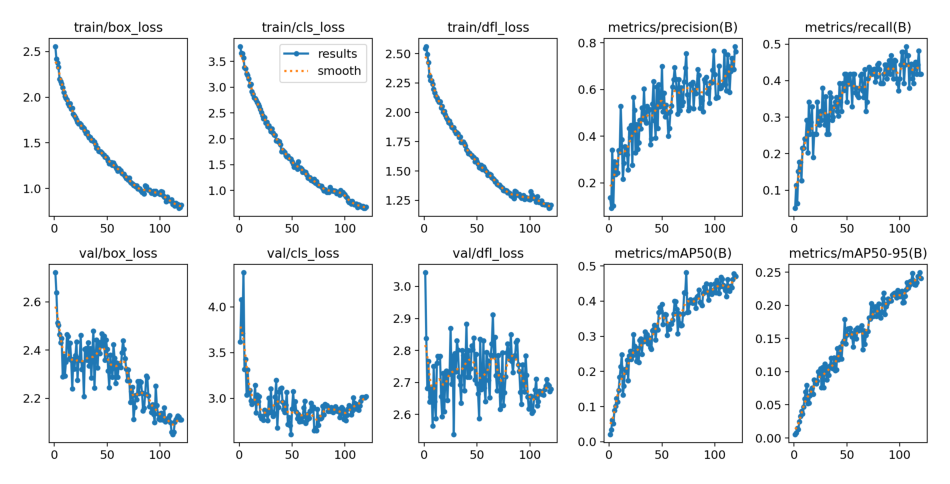

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(f"{PROJECT_DIR}/{RUN_NAME}/results.png")
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis("off")
plt.show()


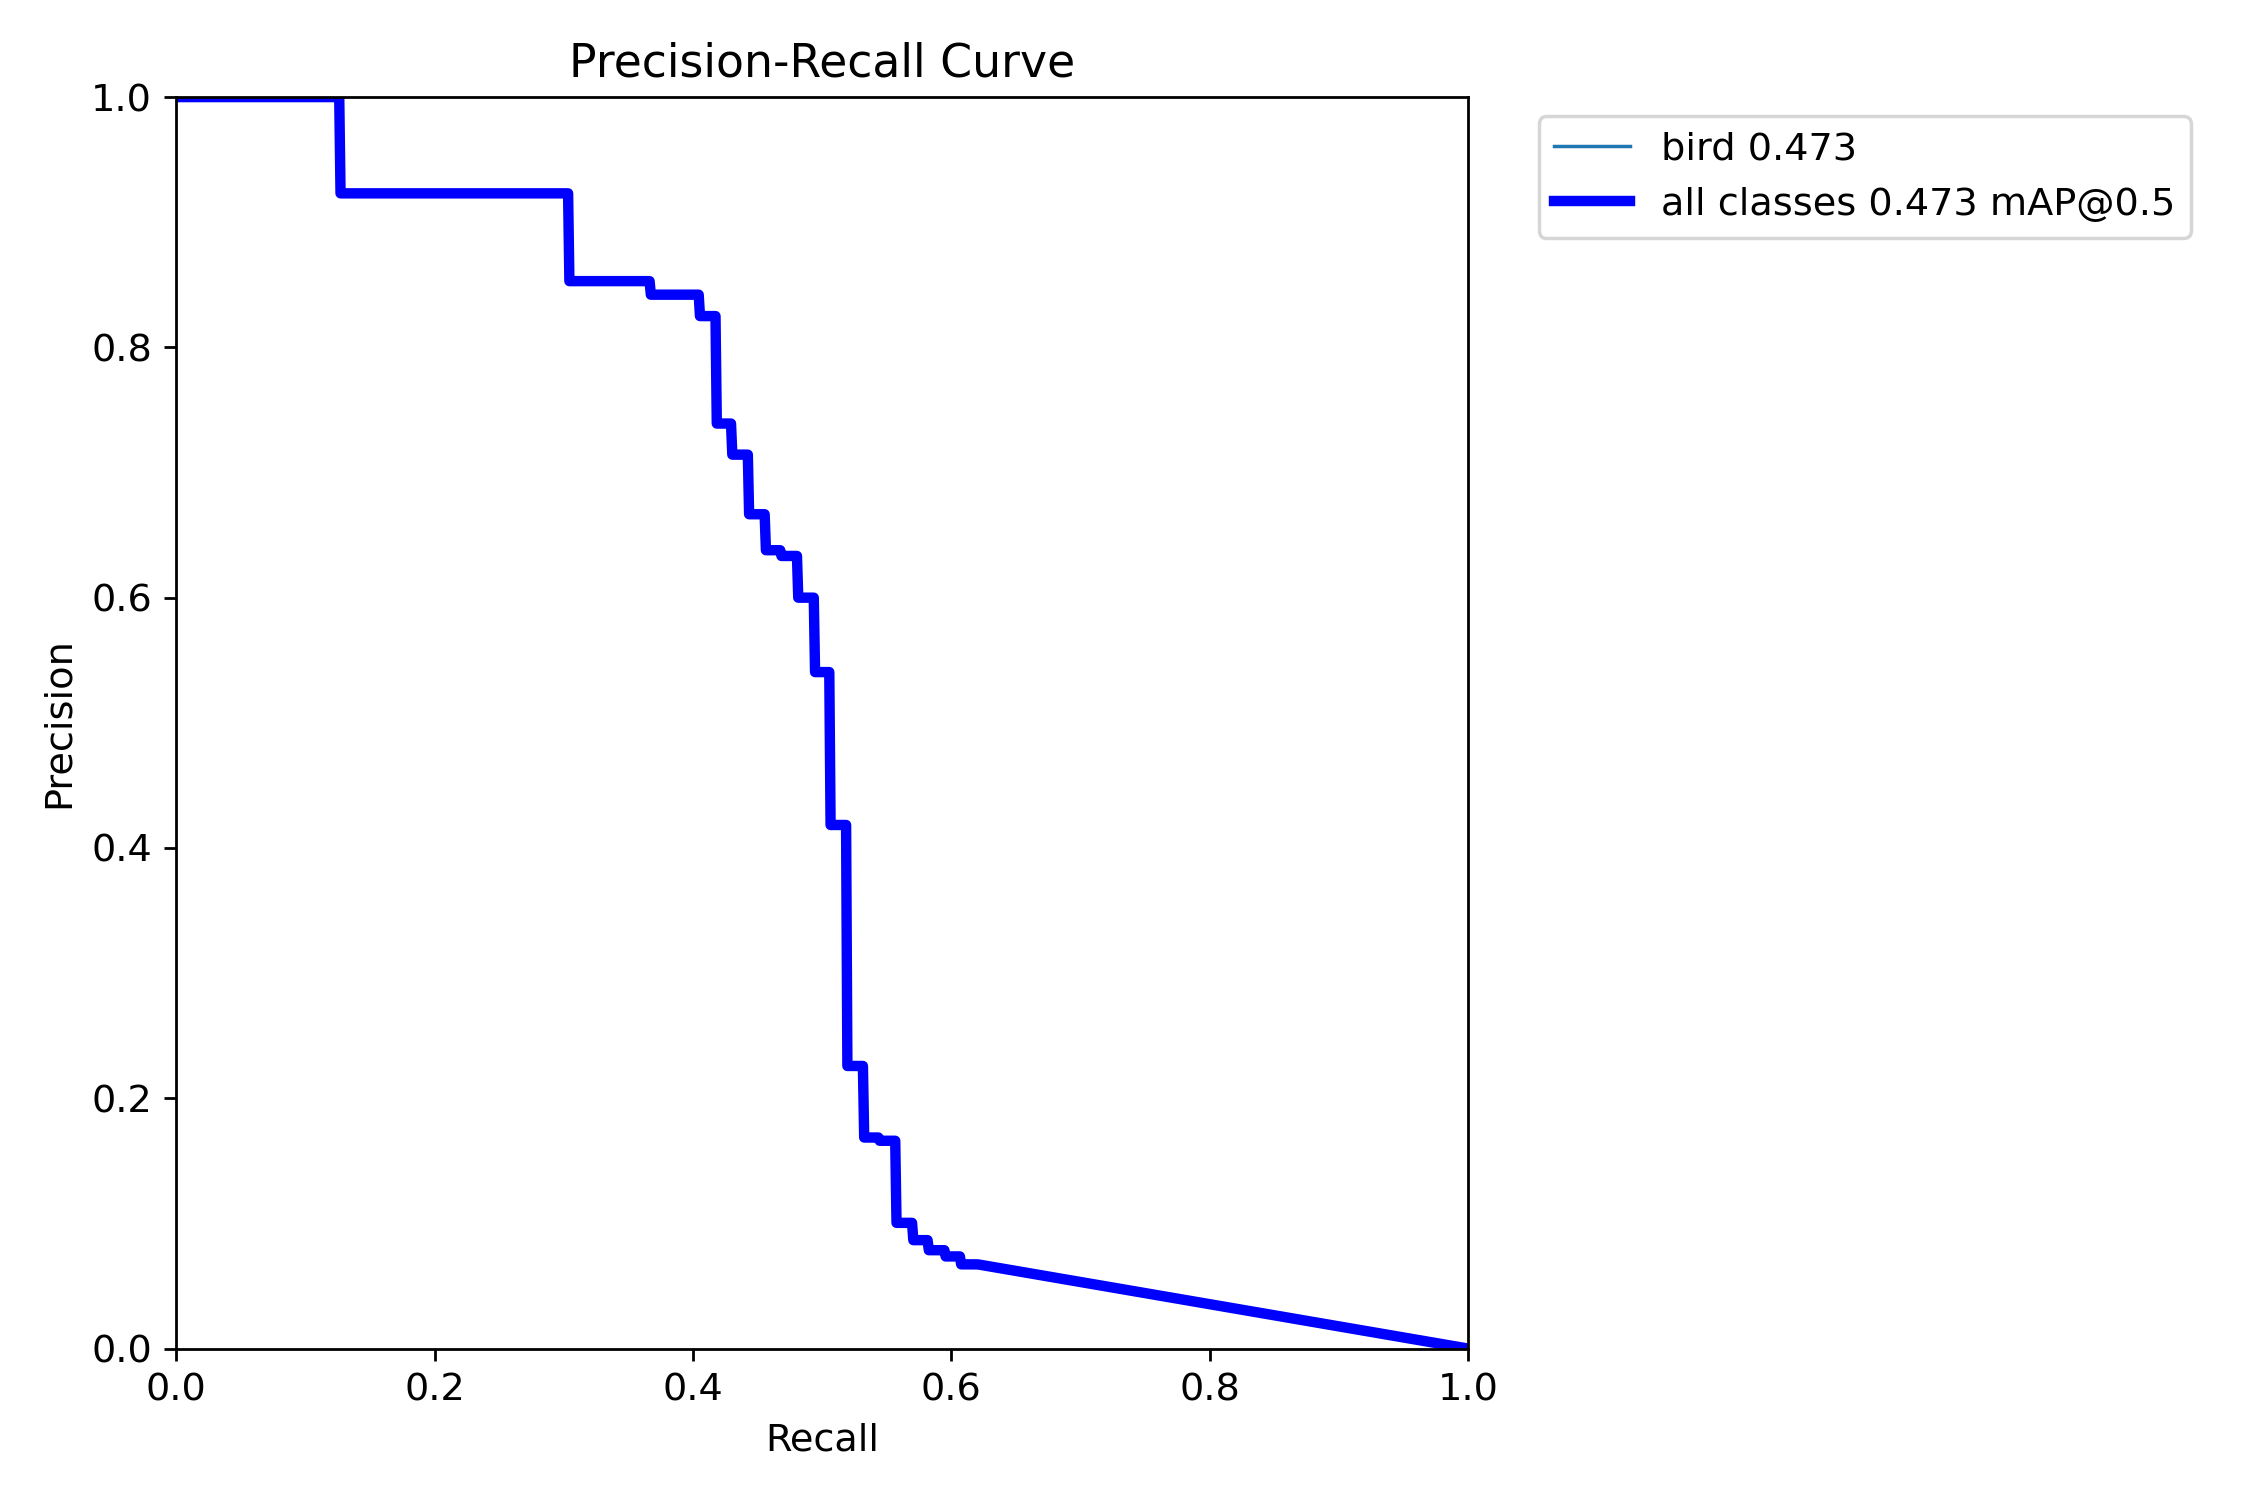

In [11]:
Image.open(f"{PROJECT_DIR}/{RUN_NAME}/BoxPR_curve.png")


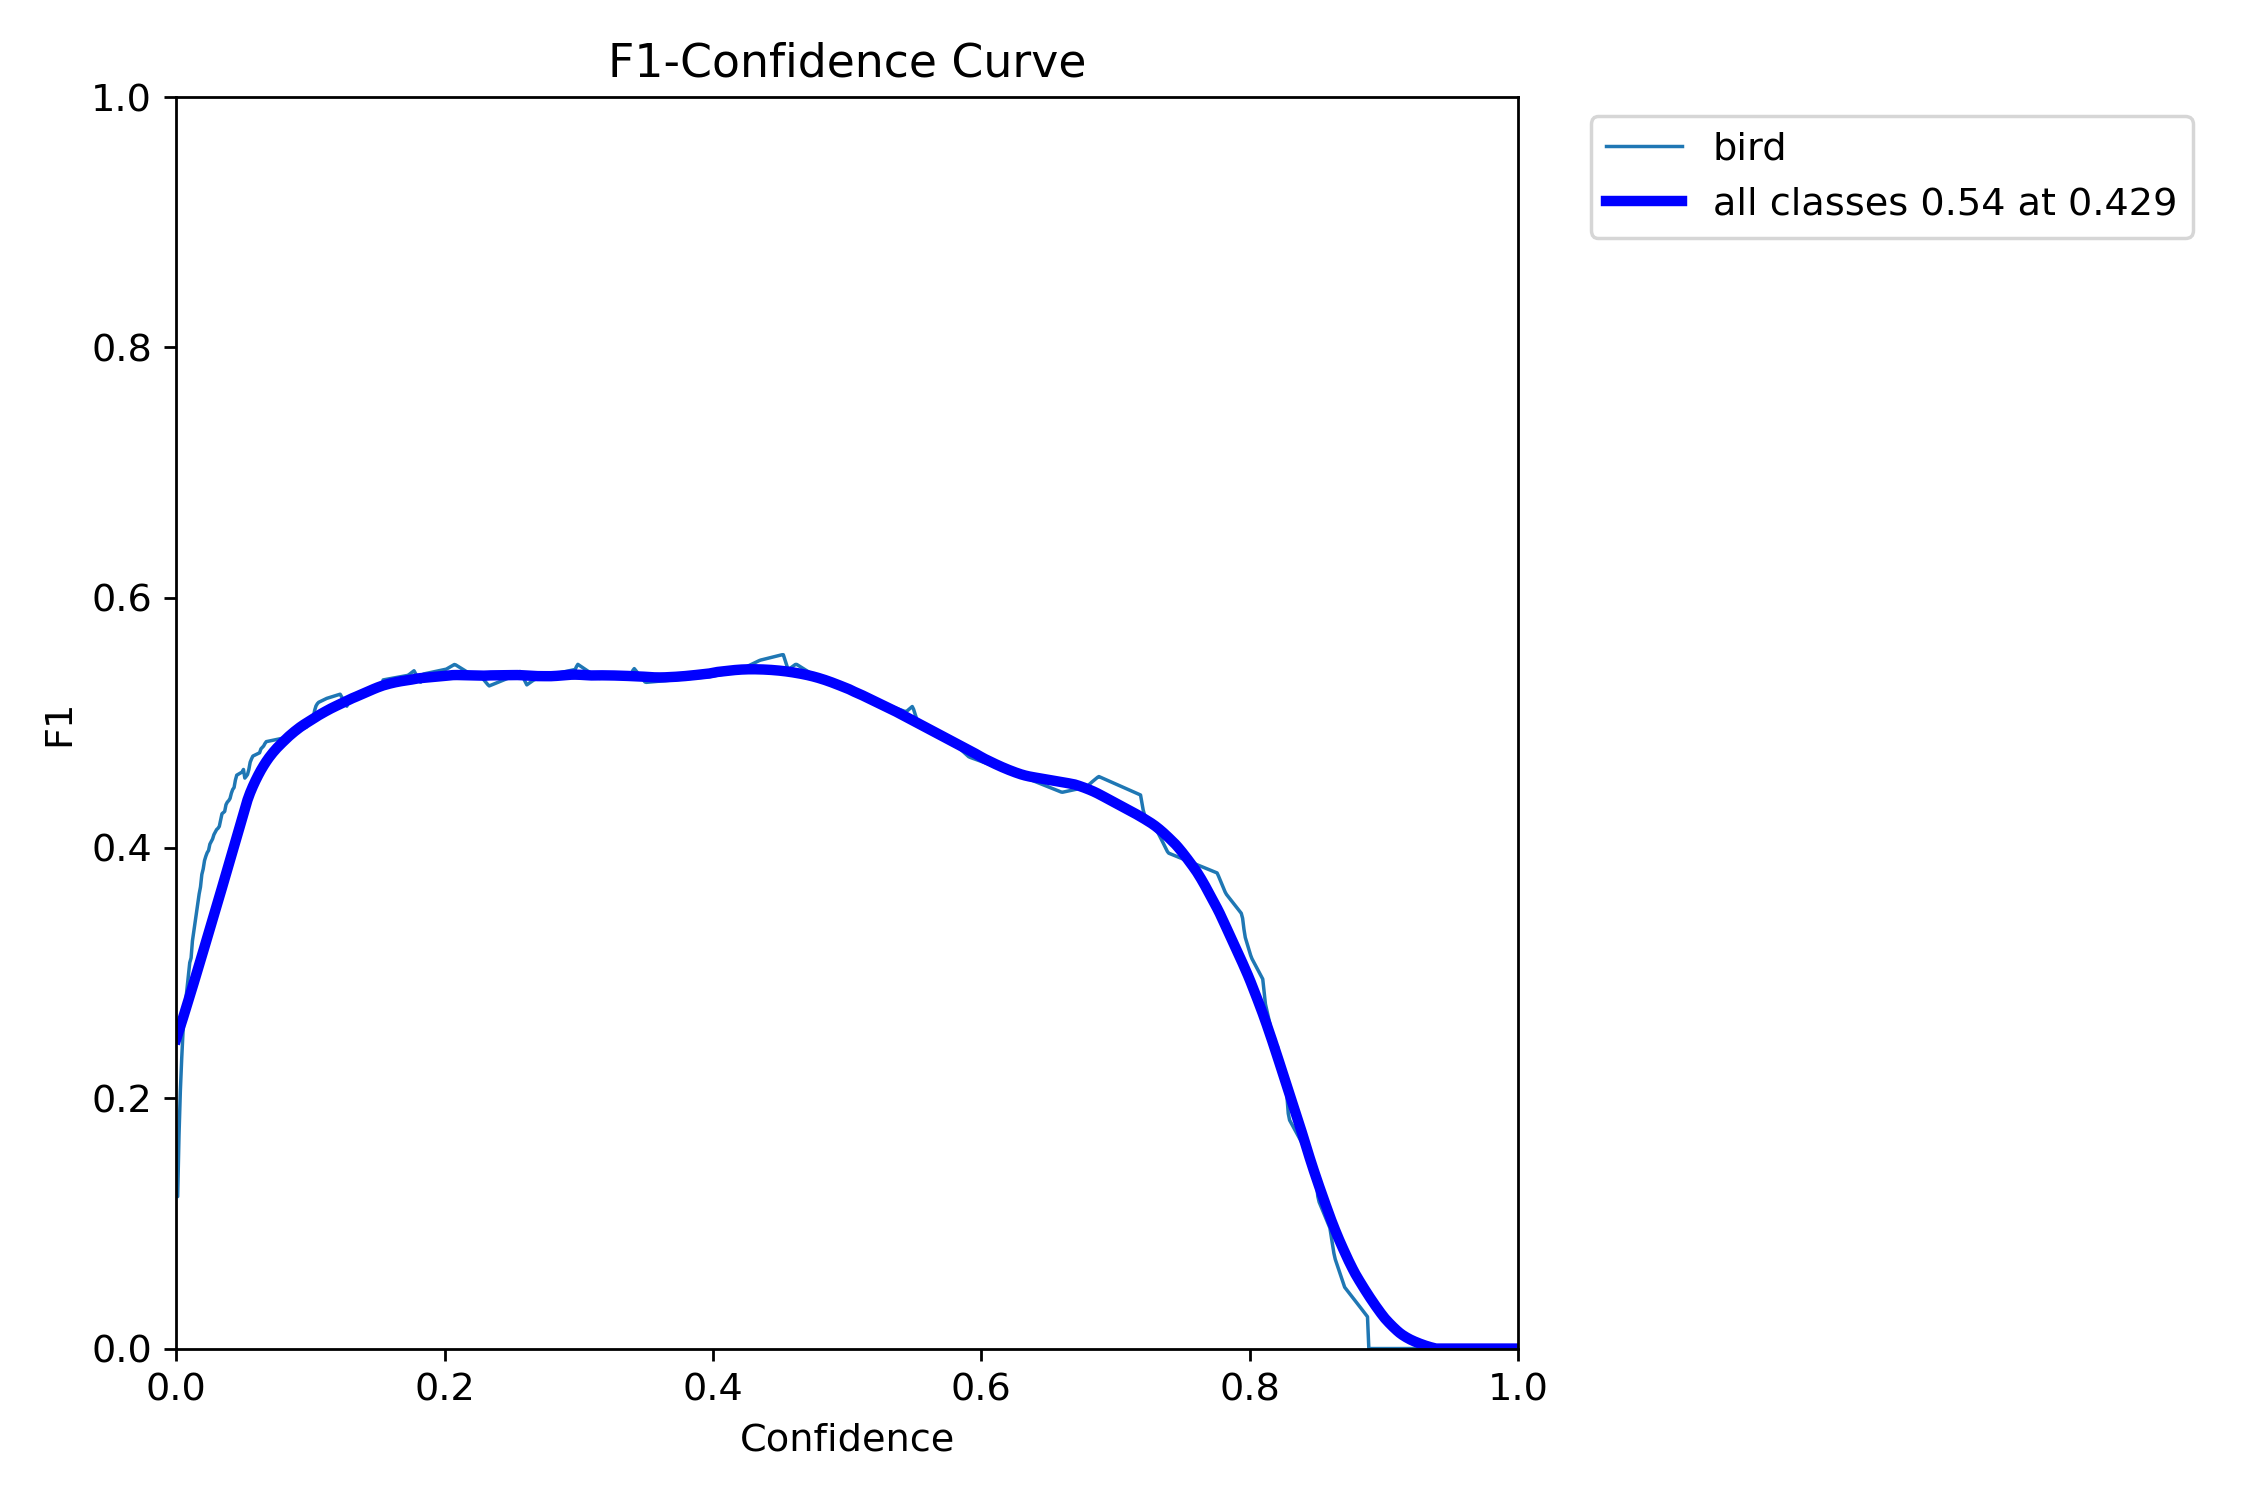

In [12]:
Image.open(f"{PROJECT_DIR}/{RUN_NAME}/BoxF1_curve.png")


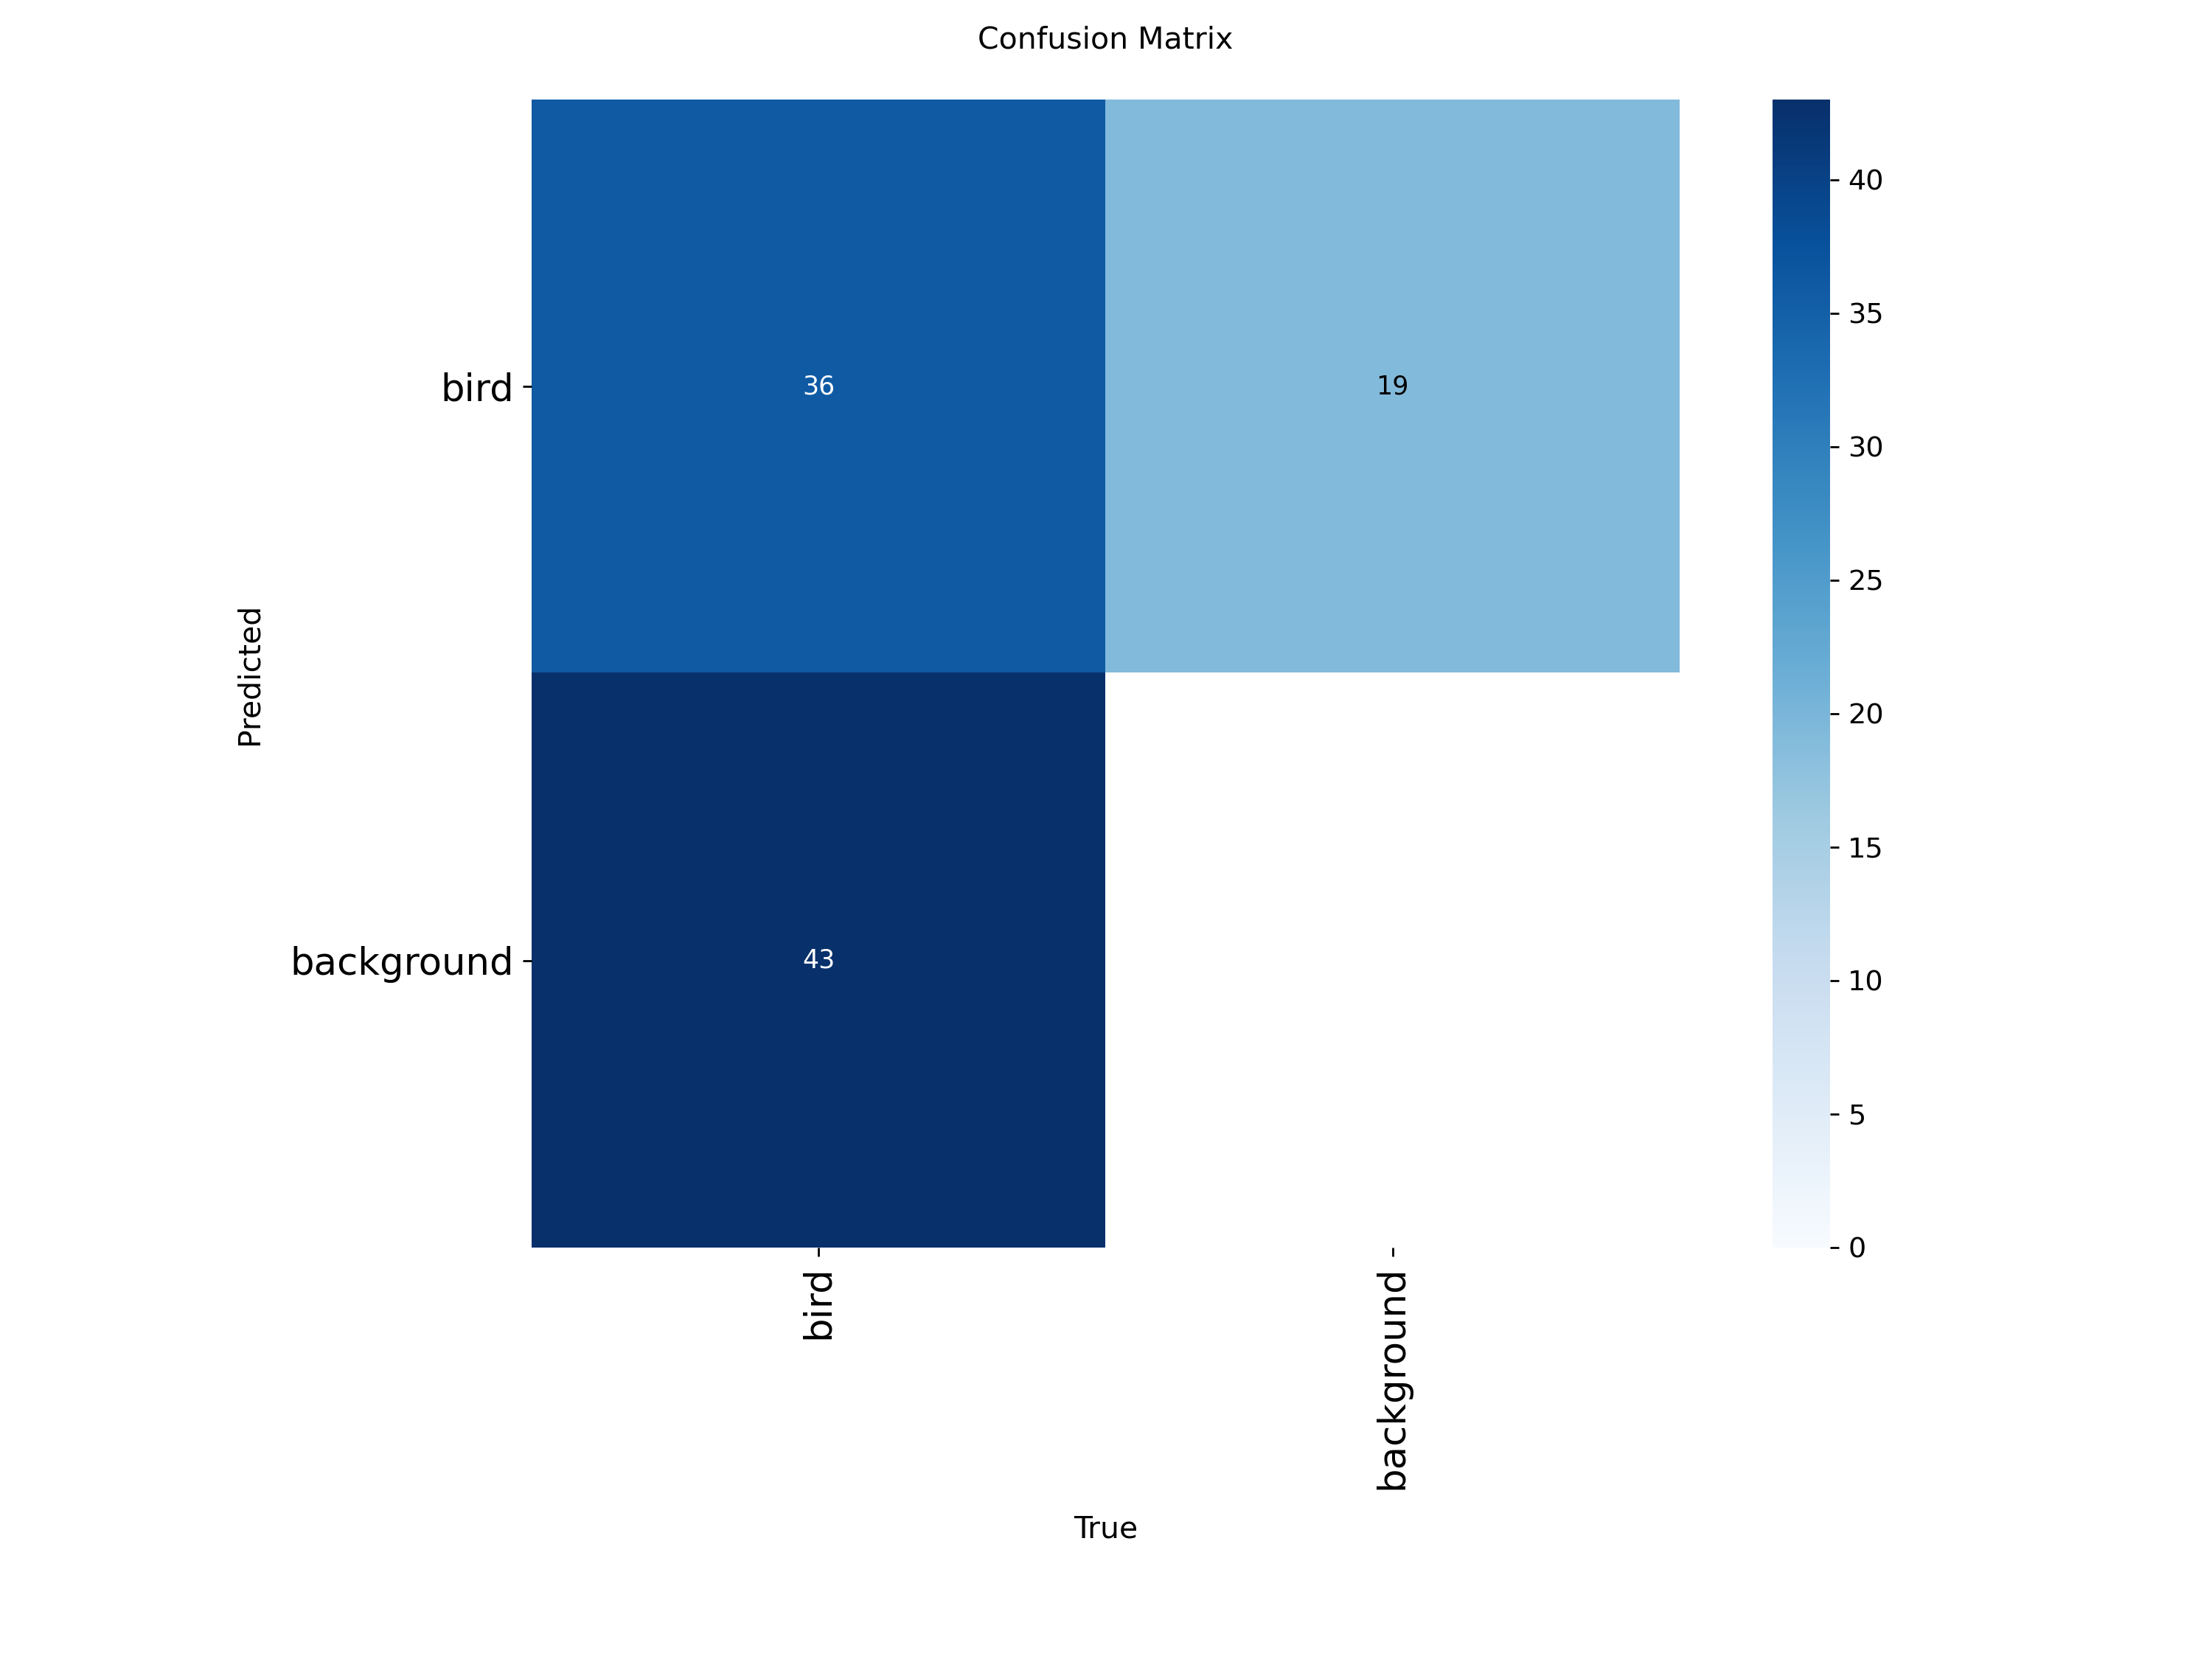

In [13]:
Image.open(f"{PROJECT_DIR}/{RUN_NAME}/confusion_matrix.png")


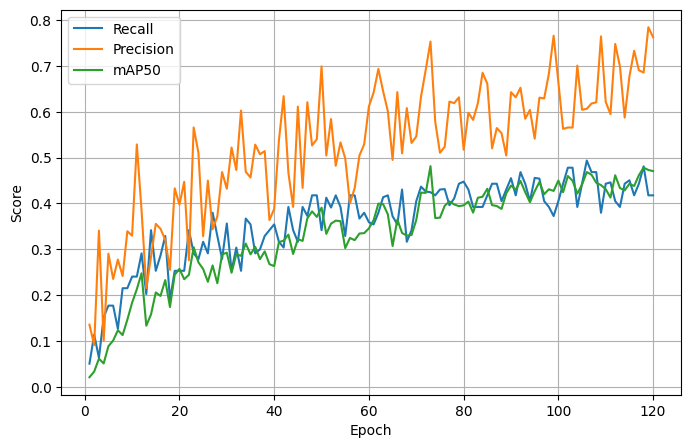

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(f"{PROJECT_DIR}/{RUN_NAME}/results.csv")

plt.figure(figsize=(8,5))
plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall")
plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision")
plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()


In [9]:

from ultralytics import YOLO
model = YOLO(f"{PROJECT_DIR}/{RUN_NAME}/weights/best.pt")
metrics = model.val(data=YAML_PATH, split="test", imgsz=512)
print(metrics.results_dict)


Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11m summary (fused): 126 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access ✅ (ping: 1.0±0.8 ms, read: 0.4±0.2 MB/s, size: 162.2 KB)
val: Scanning /content/drive/.shortcut-targets-by-id/1iTUgzLzcdzrtzd8S6OdGihbhjaBvqBOU/PIC_FINAL_512_NOLEAK2/test/labels.cache... 222 images, 148 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 222/222 38.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 21.2s/it 4:57
                   all        222         76      0.562      0.395       0.39      0.162
Speed: 5.1ms preprocess, 1315.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to /content/runs/detect/val
{'metrics/precision(B)': 0.562463494228665, 'metrics/recall(B)': 0.39473684210526316, 'metrics/mAP50(B)': 0.3902802511334834, 'metrics/mAP50-95(B)': 0.16188918666329571, 'fitness': 0.16188918666329